## Importing required libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

## Data Wrangling
- Handling categorical data
- Transforming data

In [19]:
data = pd.read_csv("./data/cleaned_data.csv")
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


### One Hot Encoding to `HomePlanet`

In [20]:
data["HomePlanet"].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [21]:
home_planet_dummies = pd.get_dummies(data["HomePlanet"], prefix="HomePlanet")
home_planet_dummies

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [22]:
data = data.join(home_planet_dummies)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0,0


In [23]:
data.drop(columns="HomePlanet", inplace=True)

In [24]:
data.head()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0,0


In [25]:
cols = list(data.columns)
cols

['CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars']

In [26]:
cols.remove("Transported")
cols.append("Transported")

In [27]:
data = data[cols]
data.head()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported
0,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,False
1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,True
2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False
3,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False
4,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,True


### One Hot Encoding to `Destination`

In [28]:
data["Destination"].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [29]:
destination_dummies = pd.get_dummies(data["Destination"], prefix="Destination")
destination_dummies

,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8688,1,0,0
8689,0,1,0
8690,0,0,1
8691,1,0,0


In [30]:
data = data.join(destination_dummies)
data.head()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,False,0,0,1
1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,True,0,0,1
2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False,0,0,1
3,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False,0,0,1
4,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,True,0,0,1


In [31]:
data.drop(columns="Destination", inplace=True)

In [32]:
data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,False,0,0,1
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,True,0,0,1
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False,0,0,1
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False,0,0,1
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,True,0,0,1


### Splitting `Cabin` to `deck`, `num` & `side`

In [35]:
data[["Cabin_deck", "Cabin_num", "Cabin_side"]] = data["Cabin"].str.split("/", expand=True)

In [36]:
data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck,Cabin_num,Cabin_side
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,False,0,0,1,B,0,P
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,True,0,0,1,F,0,S
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False,0,0,1,A,0,S
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False,0,0,1,A,0,S
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,True,0,0,1,F,1,S


In [37]:
data.drop(columns="Cabin", inplace=True)

In [38]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck,Cabin_num,Cabin_side
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,False,0,0,1,B,0,P
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,True,0,0,1,F,0,S
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False,0,0,1,A,0,S
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False,0,0,1,A,0,S
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,True,0,0,1,F,1,S


In [39]:
cols = list(data.columns)
cols.remove("Transported")
cols.append("Transported")

In [40]:
data = data[cols]
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck,Cabin_num,Cabin_side,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,B,0,P,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,F,0,S,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,A,0,S,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,A,0,S,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,F,1,S,True


### Creating new column `Expenses` consist of total expenses (`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` & `VRDeck`)

In [44]:
data["Expenses"] = data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck,Cabin_num,Cabin_side,Transported,Expenses
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,B,0,P,False,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,F,0,S,True,736.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,A,0,S,False,10383.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,A,0,S,False,5176.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,F,1,S,True,1091.0


### Comparing `Expenses` to `Cabin_deck`

In [47]:
data["Cabin_deck"].value_counts()

F    2815
G    2636
E     886
B     806
C     797
D     486
A     262
T       5
Name: Cabin_deck, dtype: int64

In [48]:
deck_groups = data.groupby("Cabin_deck")
deck_groups

In [58]:
deck_expense = deck_groups["Expenses"].transform(sum)
deck_expense


0       2327164.0
1       2774147.0
2        877161.0
3        877161.0
4       2774147.0
          ...    
8688     877161.0
8689    1112436.0
8690    1112436.0
8691    1157151.0
8692    1157151.0
Name: Expenses, Length: 8693, dtype: float64

In [61]:
data2 = data.copy(deep=True)

In [62]:
data2["Deck_expense"] = deck_expense
data2[["Cabin_deck", "Deck_expense"]]

,Cabin_deck,Deck_expense
0,B,2327164.0
1,F,2774147.0
2,A,877161.0
3,A,877161.0
4,F,2774147.0
...,...,...
8688,A,877161.0
8689,G,1112436.0
8690,G,1112436.0
8691,E,1157151.0


In [65]:
data2["Deck_expense"].value_counts()

2774147.0    2815
1112436.0    2636
1157151.0     886
2327164.0     806
3151430.0     797
1102380.0     486
877161.0      262
23582.0         5
Name: Deck_expense, dtype: int64

<AxesSubplot:xlabel='Cabin_deck', ylabel='Deck_expense'>

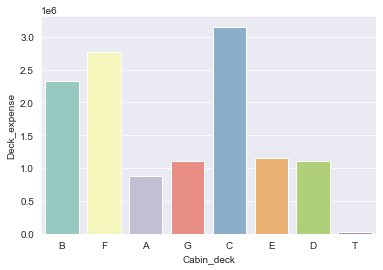

In [64]:
sns.barplot(x="Cabin_deck", y="Deck_expense", data=data2)

- Cabin deck are not in order based on their expense, so doing One Hot Encoding

### One Hot Encoding to `Cabin_deck`

In [66]:
cabin_deck_dummies = pd.get_dummies(data["Cabin_deck"], prefix="Cabin_deck")
cabin_deck_dummies

,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,1,0
8690,0,0,0,0,0,0,1,0
8691,0,0,0,0,1,0,0,0


In [69]:
pd.set_option("display.max_columns", 30)
data = data.join(cabin_deck_dummies)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck,Cabin_num,Cabin_side,Transported,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,B,0,P,False,0.0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,F,0,S,True,736.0,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,A,0,S,False,10383.0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,A,0,S,False,5176.0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,F,1,S,True,1091.0,0,0,0,0,0,1,0,0


In [70]:
data.drop(columns="Cabin_deck", inplace=True)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Cabin_side,Transported,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,P,False,0.0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,S,True,736.0,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,S,False,10383.0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,S,False,5176.0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,S,True,1091.0,0,0,0,0,0,1,0,0


In [72]:
cabin_side_dummies = pd.get_dummies(data["Cabin_side"], prefix="Cabin_side")
cabin_side_dummies

,Cabin_side_P,Cabin_side_S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8688,1,0
8689,0,1
8690,0,1
8691,0,1


In [73]:
data = data.join(cabin_side_dummies)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Cabin_side,Transported,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,P,False,0.0,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,S,True,736.0,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,S,False,10383.0,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,S,False,5176.0,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,S,True,1091.0,0,0,0,0,0,1,0,0,0,1


In [74]:
data.drop(columns="Cabin_side", inplace=True)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Transported,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,False,0.0,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,True,736.0,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,False,10383.0,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,False,5176.0,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,True,1091.0,0,0,0,0,0,1,0,0,0,1


In [75]:
cols = list(data.columns)
cols.remove("Transported")
cols.append("Transported")

In [78]:
data = data[cols]
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,1,0,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,736.0,0,0,0,0,0,1,0,0,0,1,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,10383.0,1,0,0,0,0,0,0,0,0,1,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,5176.0,1,0,0,0,0,0,0,0,0,1,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,1091.0,0,0,0,0,0,1,0,0,0,1,True


### Label Encoding the Target Variable `Transported`

In [79]:
data["Transported"].replace({False:0, True:1}, inplace=True)
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,736.0,0,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,10383.0,1,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,5176.0,1,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,1091.0,0,0,0,0,0,1,0,0,0,1,1


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   HomePlanet_Earth           8693 non-null   uint8  
 9   HomePlanet_Europa          8693 non-null   uint8  
 10  HomePlanet_Mars            8693 non-null   uint8  
 11  Destination_55 Cancri e    8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

In [81]:
data.to_csv("./data/preprocessed_data.csv", index=False)